In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
from bs4 import BeautifulSoup 
import tweepy
import json
%matplotlib inline

# Collection des données

## recupération du TSV à l'aide de request

In [34]:
with requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv') as req:
    with open('image-predictions.tsv','wb') as file:
        file.write(req.content)


## Lire les fichier tweeter Archive

In [2]:
tweets=pd.read_csv("twitter-archive-enhanced.csv")

## Lire le fichier image-predictions.tsv

In [3]:
predict_images=pd.read_csv('image-predictions.tsv',sep='\t')

## Lire les données supplémentaires

In [4]:
json_data=pd.read_json('tweet-json.txt',lines=True)

# Evaluation des données

In [5]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
697,786595970293370880,NaN,NaN,2016-10-13 15:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dale. He's a real spookster. Did me qu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786595970...,11,10,Dale,None,None,None,None
896,759099523532779520,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,None,None,None,None
821,770293558247038976,NaN,NaN,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770293558...,10,10,Jackson,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
945,752660715232722944,NaN,NaN,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752660715...,10,10,None,doggo,None,None,None


In [7]:
#verifier les noms
tweets.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [8]:
# anomalie avec le nom a
tweets[tweets.name=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [9]:
predict_images.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
predict_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
predict_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
#confirmation du doublon sur le jpg
predict_images['jpg_url'].duplicated().sum()

66

In [15]:
retweet_and_favorite=json_data[['id','retweet_count','favorite_count']]

In [16]:
retweet_and_favorite

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [17]:
retweet_and_favorite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
retweet_and_favorite.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Qualité

#####  table `tweets` 
 1. eliminer les retweets.
 2. eliminer les replies
 3. la valeur 'a' dans la colonne name n'est présice
 4. la colonne timestamp est une est string au lieu de datatime
 4. il existe des colonnes non necessaire pour une analyse 
 5. multiple valeur pour les nom 'a','Charlie', 'Cooper' et Lucy
 6. None pour definir pour designer NAN dans les colonnes doggo, floofer, pupper, puppo et name.
#####  table `predict_images`
 7. des doublons sur la colonne jpg_url
 8. les colonne p1,p2,p3 ne sont intuitevement parlantes

#####  table `retweet_and_favorite`
 9. l'identifiant (id) du tweet diffère des deux autres tables (tweet_id)

#### Rangement
1. La table `retweet_and_favorite` doit faire partie la table `tweets`
2. la table `predict_images` doit faire partie de la table `twwets`
3. quatre valeur en une colonne (doggo	floofer	pupper	puppo) sur la table `tweets`

# Nettoyage des données

In [19]:
# Copie des différentes tables
tweets_clean=tweets.copy()
predict_images_clean=predict_images.copy()
retweet_and_favorite_clean=retweet_and_favorite.copy()

#### Definir
Eliminer les retweet 

#### Code

In [20]:
# Enlever le retweet
tweets_clean=tweets_clean[tweets_clean['retweeted_status_user_id'].isnull()]

#### Test

In [21]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [22]:
tweets_clean.shape

(2175, 17)

#### Definir
Eliminer les reponses du tweets

#### Code

In [23]:
#supprimer ceux qui n'ont pas de reponse
tweets_clean=tweets_clean[tweets_clean['in_reply_to_status_id'].isnull()]


#### Test

In [24]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [25]:
tweets_clean.shape

(2097, 17)

In [26]:
tweets_clean.name.value_counts()

None          603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

#### Definir
Supprimer le nom 'a'

In [27]:
#supprimer les doublons
#tweets_clean.drop_duplicates(subset='name', keep="last", inplace=True)

#### Code

In [28]:
tweets_clean=tweets_clean[tweets_clean.name!='a']

#### Test

In [29]:
tweets_clean.name.value_counts()

None          603
Charlie        11
Lucy           11
Oliver         10
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 954, dtype: int64

#### Definir
Convertir la colonne timestamp de string en datetime

#### Code

In [30]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

#### Test

In [31]:
tweets_clean.timestamp.dtypes

datetime64[ns, UTC]

#### Definir
Se débarasser des colonnes qui n'ajouteront pas de la valeur à l'analyse

#### Code

In [32]:
#Envlèver les colonnes inutiles
cols=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
tweets_clean.drop(cols, axis=1, inplace=True)

#### Test

In [33]:
list(tweets_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Définir
Remplacer None par NaN dans les colonnes doggo','pupper', 'floofer', 'puppo' et name

#### Code

In [34]:
# Remplacement en utilisant la fonction replace
cols = ['doggo','pupper', 'floofer', 'puppo','name' ]
for c in cols:
       tweets_clean[c] = tweets_clean[c].replace('None', '')

#### Test

In [35]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


#### Définir
Sur la table predict images supprimer les doublons sur jpg_url 

#### Code

In [36]:
predict_images=predict_images.drop_duplicates(subset='jpg_url', keep="last")

#### Test

In [37]:
predict_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [38]:
predict_images.jpg_url.nunique()

2009

#### Définir
Renommer les colonnes p1,p2,p3 de predict_images et la colonne id de retweet_and_favorite

In [39]:
predict_images.rename(columns={'p1':'prediction_1'},inplace=True)
predict_images.rename(columns={'p2':'prediction_2'},inplace=True)
predict_images.rename(columns={'p3':'prediction_3'},inplace=True)
retweet_and_favorite.rename(columns={'id':'tweet_id'},inplace=True);

C:\Users\dell\AppData\Local\Temp\ipykernel_14588\1947398462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweet_and_favorite.rename(columns={'id':'tweet_id'},inplace=True);


#### Test

In [40]:
list(predict_images)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'p1_conf',
 'p1_dog',
 'prediction_2',
 'p2_conf',
 'p2_dog',
 'prediction_3',
 'p3_conf',
 'p3_dog']

In [41]:
list(retweet_and_favorite)

['tweet_id', 'retweet_count', 'favorite_count']

#### Définir
Regrouper les colonnes des étapes du chien. En suite supprimer les colonnes originales devenues inutiles 

#### Code

In [42]:
# regrouper les colonnes
tweets_clean['etape_chien'] = tweets_clean['doggo']+tweets_clean['floofer']+tweets_clean['pupper']+tweets_clean['puppo']

In [43]:
tweets_clean['etape_chien'] = tweets_clean['etape_chien'].replace('', np.nan)

In [44]:
#supprimer les colonnes originales
colonnes_originales=['doggo','floofer','pupper','puppo']
tweets_clean.drop(colonnes_originales, axis=1, inplace=True)

#### Test

In [45]:
tweets_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,etape_chien
1549,689255633275777024,2016-01-19 01:18:43+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ferg. He swallowed a chainsaw. 1 like ...,https://vine.co/v/iOL792n5hz2,10,10,Ferg,NaN
2047,671518598289059840,2015-12-01 02:38:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,NaN
1310,707038192327901184,2016-03-08 03:00:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,https://twitter.com/dog_rates/status/707038192...,10,10,Kathmandu,NaN
2009,672254177670729728,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper
933,753655901052166144,2016-07-14 18:22:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""The dogtor is in hahahaha no but seriously I'...",https://twitter.com/dog_rates/status/753655901...,10,10,,NaN
1458,695074328191332352,2016-02-04 02:40:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorenzo. He's educated af. Just gradua...,https://twitter.com/dog_rates/status/695074328...,11,10,Lorenzo,pupper
820,770414278348247044,2016-08-30 00:14:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,https://twitter.com/dog_rates/status/770414278...,11,10,Al,NaN
1606,685667379192414208,2016-01-09 03:40:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,pupper
977,750011400160841729,2016-07-04 17:00:26+00:00,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo
1639,684177701129875456,2016-01-05 01:00:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,NaN


#### Définr 
regrouper les trois tables en une seule 

#### Code

In [46]:
#Combiner tweets_clean et retweet_and_favorite 
tweets_clean = pd.merge(tweets_clean, retweet_and_favorite,on='tweet_id', how='left')

In [47]:
#Combine tweets_clean et predict_images
tweets_clean = pd.merge(tweets_clean, predict_images,on='tweet_id', how='left')

#### Test

In [48]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,etape_chien,retweet_count,...,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [49]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,etape_chien,retweet_count,...,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Sauvegarder le dataframe sous twitter_archive_master.csv

In [324]:
tweets_clean.to_csv('twitter_archive_master.csv',index=False)

# Analyse et visualisation des données
> Repondre aux questions suivantes:
> - Quel est le nom de chien le plus fréquent?
> - Quelle etape de chien est la plus dominante?
> - Quelle etape de chien a le plus des retweets?
> - Quelle relation existe-t-il entre le nombre des favories et le nombre de retweets?

In [50]:
donnees_globales=pd.read_csv('twitter_archive_master.csv')

In [51]:
donnees_globales.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,etape_chien,retweet_count,...,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


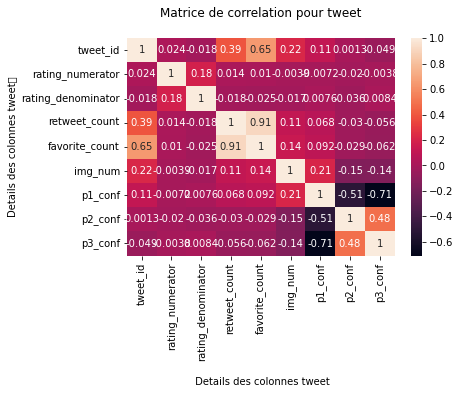

In [70]:
mar_corr = sns.heatmap(donnees_globales.corr(), annot = True)
mar_corr.set(xlabel='\n Details des colonnes tweet', ylabel='Details des colonnes tweet\t', title = "Matrice de correlation pour tweet\n");

### Quel est le nom de chien le plus fréquent ?

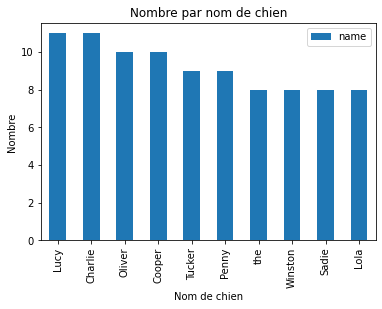

In [71]:
donnees_globales.name.value_counts().nlargest(10).plot(kind='bar');
plt.title('Nombre par nom de chien')
plt.xlabel('Nom de chien')
plt.ylabel('Nombre')
plt.legend();

##### Le nom Lucy et Charlie est donc le plus fréquent dans ce jeux de donnée. Ce deux premier nom sont suivis de Olivier et Cooper qui approximativement le même nombre.

### Quelle etape de chien est la plus dominante?

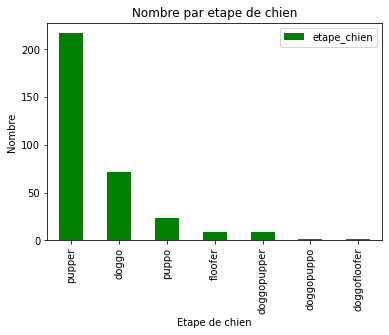

In [73]:
donnees_globales.etape_chien.value_counts().plot(kind='bar',color='green');
plt.title('Nombre par etape de chien')
plt.xlabel('Etape de chien')
plt.ylabel('Nombre')
plt.legend();

##### L'etape Pupper est la plus dominante suivie de doggo qui parrait plus de trois fois moins nombreuse.

### Quelle etape de chien a le plus des retweets?

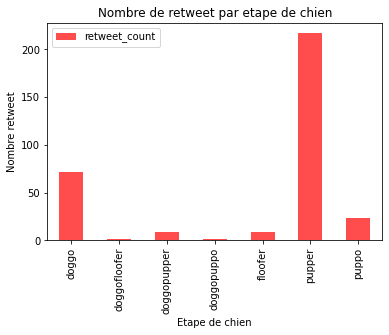

In [75]:
donnees_globales.groupby("etape_chien").retweet_count.count().plot(kind='bar', color='r', alpha=0.7);
plt.title('Nombre de retweet par etape de chien')
plt.xlabel('Etape de chien')
plt.ylabel('Nombre retweet')
plt.legend();

#### L'eatape de chien pupper est la plus retweetée suivie de doggo, ce qui peut être traduire leurs intérret au yeux des gens.

### Quelle relation existe-t-il entre le nombre des favories et le nombre de retweets?

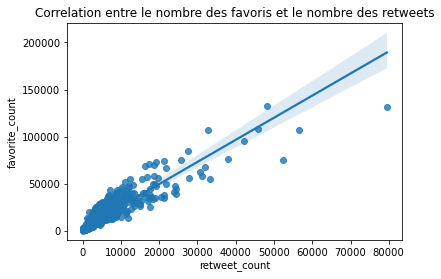

In [65]:
sns.regplot(x=donnees_globales.retweet_count, y=donnees_globales.favorite_count)
plt.title('Correlation entre le nombre des favoris et le nombre des retweets');

####  Nous remarquons qu'il existe une forte correlation entre le nombre des retweets et celui des favoris. Neanmoins le nombre de retweet  n'a parfois pas forcement une influence direct sur le nombre des favoris. Il y'a des tweets des tweet beaucoup moins retweetés mais qui ont un nombre de favori élèvé. 

# Reférences
- https://www.statology.org/pandas-drop-rows-that-contain-string/
- https://stackoverflow.com/questions/12497402/remove-duplicates-by-columns-a-keeping-the-row-with-the-highest-value-in-column
- https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe
- https://datatofish.com/data-type-pandas-dataframe/
- http://net-informations.com/ds/pd/comb.htm
- https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/#:~:text=You%20can%20plot%20correlation%20between,What%20is%20this%3F&text=You%20can%20see%20the%20correlation%20of%20the%20two,the%20dataframe%20as%20a%20scatterplot.
